In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('Yennefer_processed.csv', sep='|', encoding='utf-8', quoting=csv.QUOTE_NONE)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1203 entries, 0 to 1202
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Audio                 1203 non-null   object 
 1   Scene                 1203 non-null   object 
 2   Content               1203 non-null   object 
 3   Duration              1203 non-null   float64
 4   Processed             1203 non-null   object 
 5   Attribute             539 non-null    object 
 6   Count                 1203 non-null   int64  
 7   Syllables             1203 non-null   int64  
 8   fasttext              1203 non-null   object 
 9   fasttext_processed    1203 non-null   object 
 10  cld2                  1082 non-null   object 
 11  cld2_processed        1082 non-null   object 
 12  langdetect            1203 non-null   object 
 13  langdetect_processed  1203 non-null   object 
dtypes: float64(1), int64(2), object(11)
memory usage: 131.7+ KB


In [4]:
df['Count'].describe()

count    1203.000000
mean       10.426434
std         7.352218
min         1.000000
25%         5.000000
50%         9.000000
75%        15.000000
max        52.000000
Name: Count, dtype: float64

In [5]:
df['Syllables'].describe()

count    1203.000000
mean       13.362427
std         9.889741
min         1.000000
25%         6.000000
50%        11.000000
75%        18.000000
max        69.000000
Name: Syllables, dtype: float64

In [6]:
df['Syllables'].median()

11.0

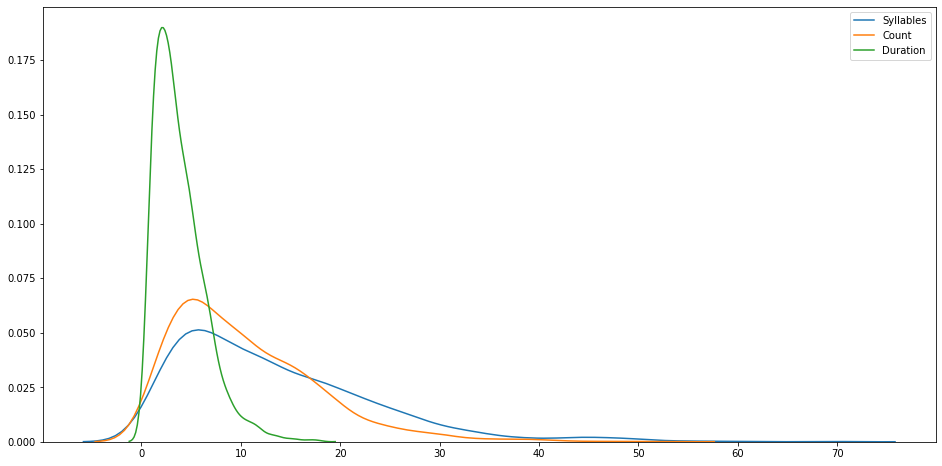

In [7]:
# KDE
plt.figure(figsize=(16,8))
sns.kdeplot(df['Syllables'])
sns.kdeplot(df['Count'])
sns.kdeplot(df['Duration'])
plt.legend()
plt.show()

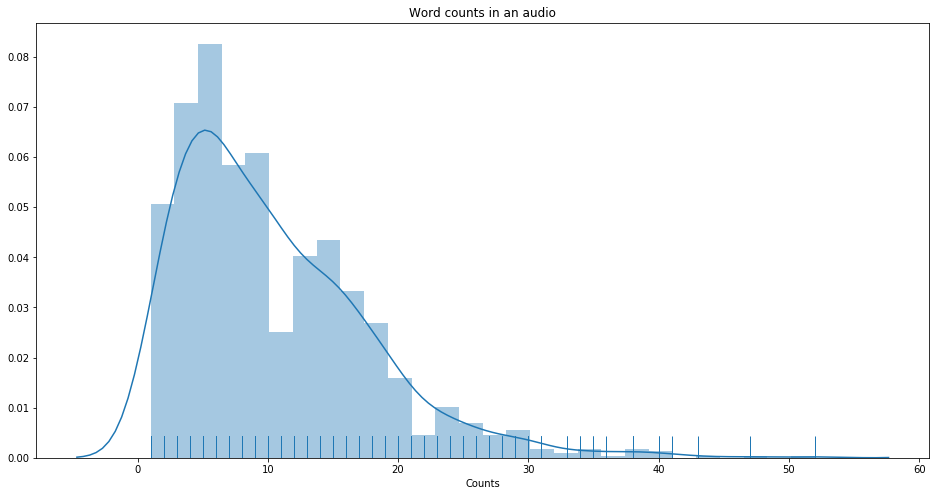

In [8]:
plt.figure(figsize=(16,8))
ax = sns.distplot(df['Count'], kde=True, rug=True)
ax.set_title('Word counts in an audio')
ax.set_xlabel('Counts')
plt.show()

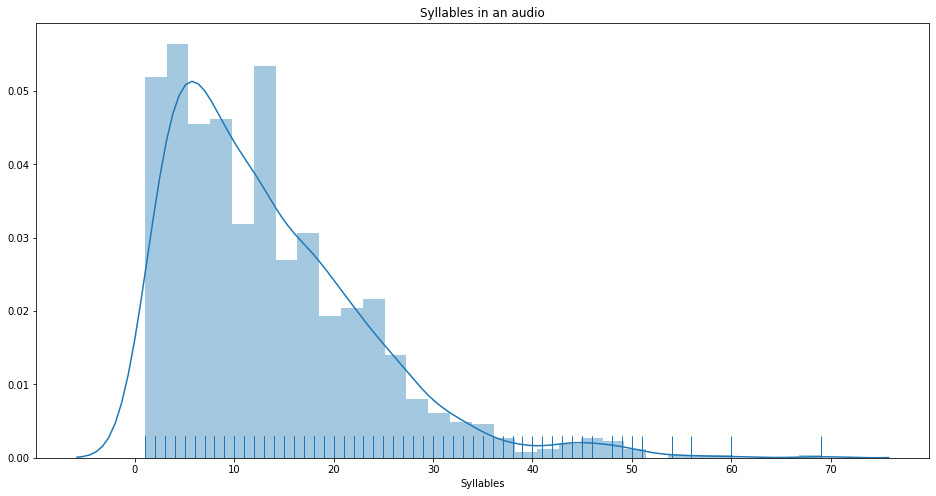

In [9]:
plt.figure(figsize=(16,8))
ax = sns.distplot(df['Syllables'], kde=True, rug=True)
ax.set_title('Syllables in an audio')
ax.set_xlabel('Syllables')
plt.show()

## Let's explore the relationship between syllables/duration and counts/duration

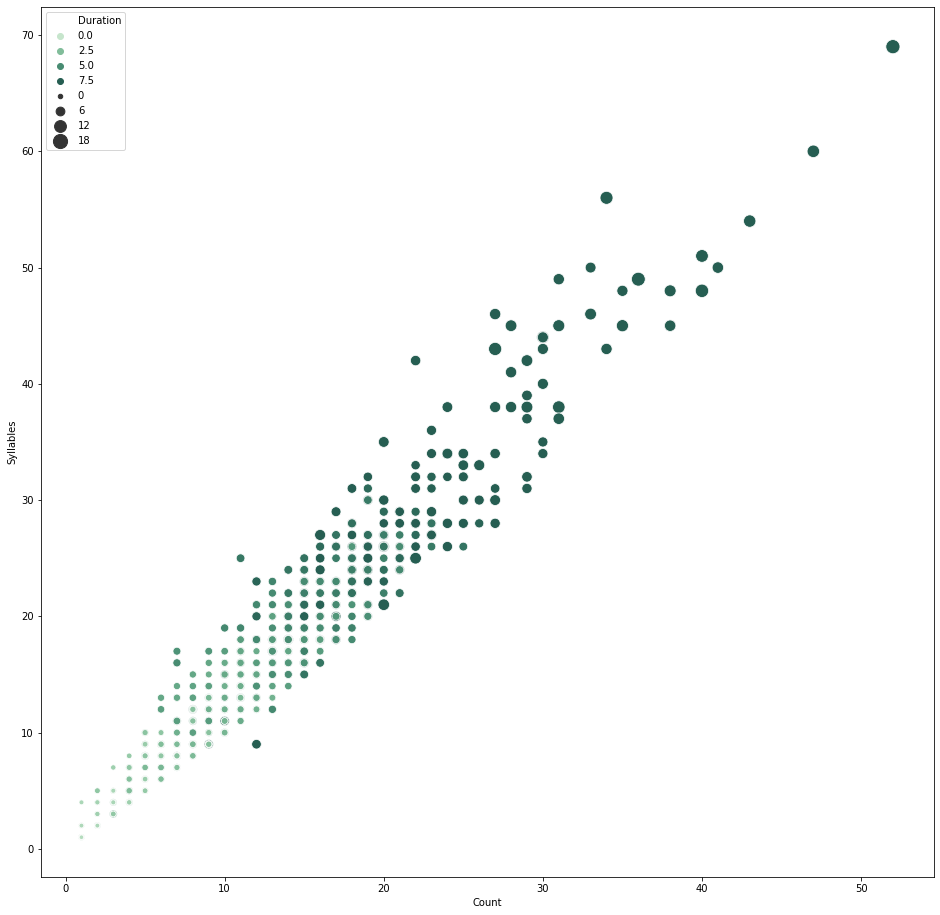

In [11]:
plt.figure(figsize=(16,16))
ax = sns.scatterplot(
    x='Count', y='Syllables', hue='Duration', size='Duration', sizes=(20, 200), palette="ch:2.5,-.2,dark=.3",
    hue_norm=(0, 7), legend="brief", data=df
)
plt.show()

## Let's compare whether count or syllables has a better correlation to duration

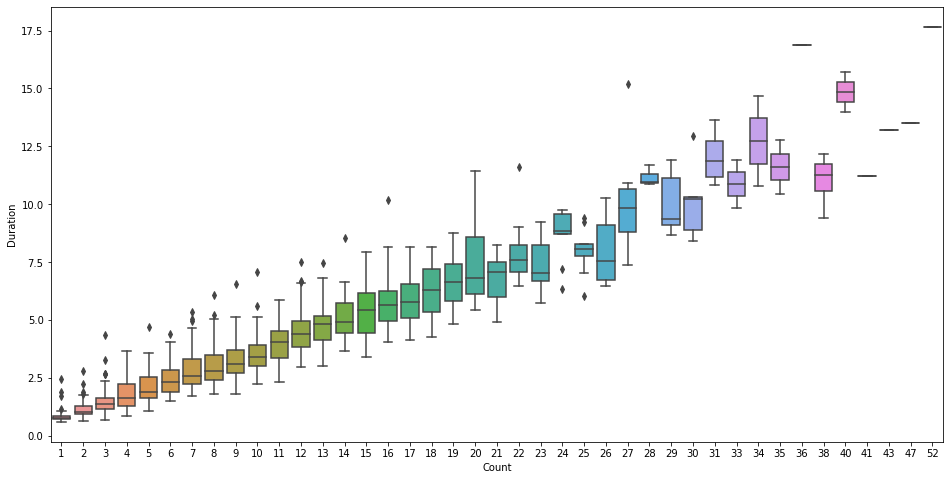

In [12]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(x="Count", y="Duration", data=df)
plt.show()

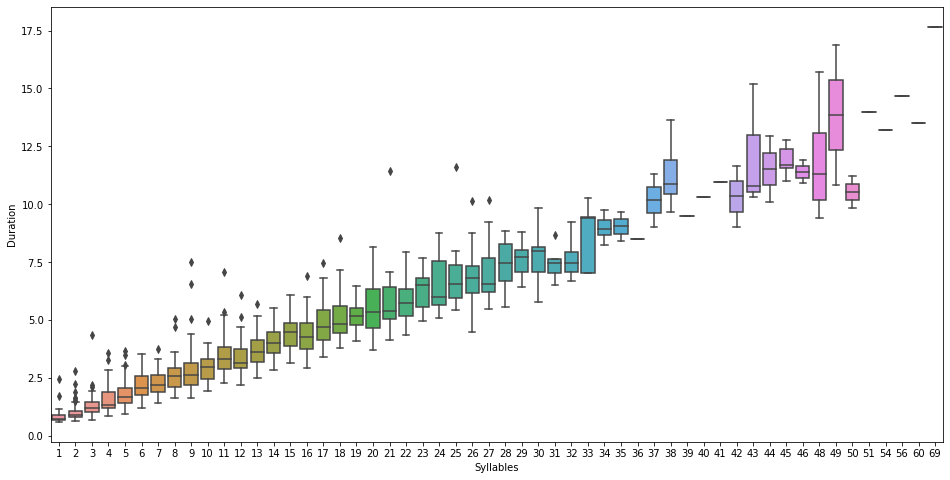

In [13]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(x="Syllables", y="Duration", data=df)
plt.show()

## Let's find the Pearson's Correlation

In [14]:
df['Count'].corr(df['Duration'])

0.9324881590229931

In [15]:
df['Syllables'].corr(df['Duration'])

0.9424600876939654

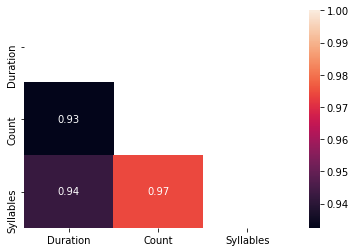

In [16]:
matrix = np.triu(df.corr())
ax = sns.heatmap(df.corr(), annot=True, mask=matrix)
plt.show()

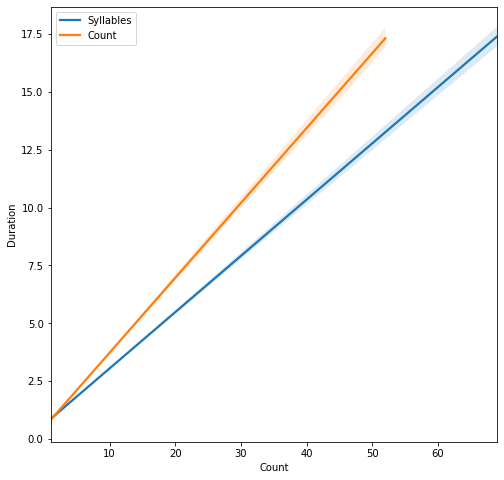

In [17]:
plt.figure(figsize=(8,8))
sns.regplot(x="Syllables", y="Duration", scatter=False, label='Syllables', data=df)
sns.regplot(x="Count", y="Duration", scatter=False, label='Count', data=df)
plt.legend()
plt.show()

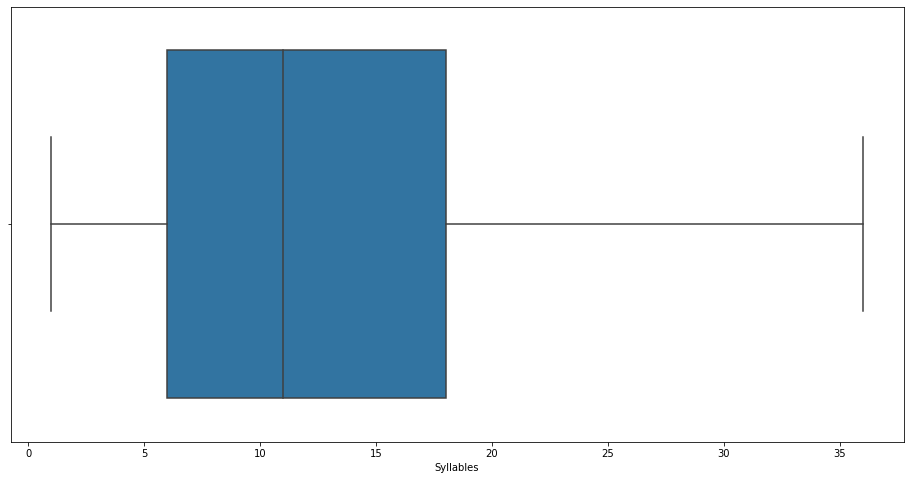

In [18]:
plt.figure(figsize=(16,8))
ax = sns.boxplot(x="Syllables", showfliers=False, data=df)
plt.show()

## It seems 5 syllables or above is a good choice for precision